[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [18]:
pwd


'/content/SadTalker'

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


In [20]:
# 1. Set up Python 3.8 as the default
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8 &> /dev/null
!sudo apt-get install python3.8-distutils &> /dev/null
!python --version
print('✅ Python 3.8 installed and set as default.')

# 2. Update system packages and install essentials
!apt-get update &> /dev/null
!apt install software-properties-common &> /dev/null
!apt-get install python3-pip &> /dev/null
!apt install ffmpeg &> /dev/null
print('✅ System utilities and ffmpeg installed.')

# 3. Clone project and set PYTHONPATH
# (Assuming you have already cloned SadTalker in /content/SadTalker)
import os
os.environ['PYTHONPATH'] = "/content/SadTalker:" + os.environ.get('PYTHONPATH', '')
print('✅ PYTHONPATH configured.')

# 4. Install the correct version of PyTorch
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
print('✅ PyTorch installed.')
# 5. PRE-INSTALL THE PROBLEMATIC PACKAGES
print('\nInstalling problematic packages with specific fixes...')
!python3.8 -m pip install --upgrade pip setuptools wheel
!python3.8 -m pip install git+https://github.com/rodjjo/filterpy.git  # Patched filterpy
!python3.8 -m pip install basicsr==1.4.2 facexlib==0.3.0 gfpgan==1.3.8 # Specific, stable versions
print('✅ Problematic packages pre-installed successfully.')

# 6. NOW, install the rest of the requirements
print('\nInstalling the rest of the requirements...')
!python3.8 -m pip install -r requirements.txt
print('✅ All requirements installed successfully!')


update-alternatives: error: alternative path /usr/bin/python3.9 doesn't exist
Python 3.12.11
✅ Python 3.8 installed and set as default.
✅ System utilities and ffmpeg installed.
✅ PYTHONPATH configured.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
✅ PyTorch installed.

Installing problematic packages with specific fixes...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 KB 11.0 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.1
    Not uninstalling wheel at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'wheel'. No files were found to uninstall.
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.1.2
    Not uninstalling setuptools at /usr/lib/python3/dist-packages, outside environment

Download models (1 mins)

In [1]:
!pip install --upgrade pip setuptools wheel

In [2]:
!pip install git+https://github.com/rodjjo/filterpy.git

  Cloning https://github.com/rodjjo/filterpy.git to /tmp/pip-req-build-kfz5g5wm
  Running command git clone --filter=blob:none --quiet https://github.com/rodjjo/filterpy.git /tmp/pip-req-build-kfz5g5wm
  Resolved https://github.com/rodjjo/filterpy.git to commit a34721e266c4c39f8abd5037ea83c2ed774d9606
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'filterpy' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'filterpy'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=111269 sha256=6a678c3a660e51d1f49ceedb3c045190e9d3f26d6dfa5f5b19eff969a5075a4e
  Stored in directory: /tmp/pip-ephem-whe

In [5]:
cd SadTalker/


/content/SadTalker


In [21]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Download pre-trained models...
--2025-09-24 18:50:01--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-24T19%3A40%3A44Z&rscd=attachment%3B+filename%3Dmapping_00109-model.pth.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-24T18%3A39%3A52Z&ske=2025-09-24T19%3A40%3A44Z&sks=b&skv=2018-11-09&sig=ZCgvQJ4cQ9cpaTDZGax9j6pUJXEU8kKBMeOuGwDYNO8%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1ODc0MDEwMiwibmJ

'/content'

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

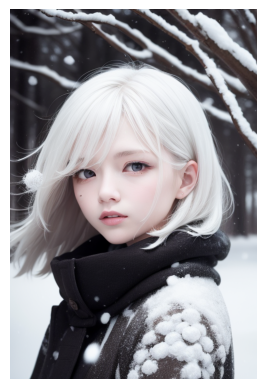

In [22]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [9]:
!pip install facexlib

In [17]:
!pip install facexlib

In [23]:
# selected audio from exmaple/driven_audio

img = 'examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/RD_Radio31_000.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

examples/source_image/full3.png
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00, 15.41it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 21.86it/s]
mel:: 100% 200/200 [00:00<00:00, 40557.98it/s]
audio2exp:: 100% 20/20 [00:00<00:00, 308.08it/s]
Face Renderer:: 100% 100/100 [00:55<00:00,  1.79it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 259) to (256, 272) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named ./results/2025_09_24_18.50.53/full3##RD_Radio31_000.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
seamlessClone:: 100% 200/200 [00:32<00:00,  6.14it/s]
The generated video is

In [24]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


Display animation: ./results/2025_09_24_18.50.53.mp4


In [ ]:
# =====================================================================================
# CELL 2: AI ASSISTANT LOGIC
# =====================================================================================
import os
from gtts import gTTS
from langchain.memory import ConversationSummaryBufferMemory
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from google.colab import userdata

# --- 1. API Key and Model Initialization ---
try:
    GROQ_API_KEY = userdata.get('GROQ_API_KEY')
    os.environ['GROQ_API_KEY'] = GROQ_API_KEY
except Exception as e:
    print("🚨 Error: GROQ_API_KEY not found in Colab Secrets.")
    print("Please add it via the '🔑' icon on the left panel.")
    raise e

# We use Groq which is very fast and works well in Colab
llm = ChatGroq(model_name="llama3-8b-8192", temperature=0.7)

# --- 2. Text-to-Speech Function ---
def text_to_speech(text: str, output_filename: str = "assistant_response.wav"):
    """Converts a text string to an audio file and saves it."""
    try:
        print(f"🎙️ Generating audio for: '{text}'")
        tts = gTTS(text=text, lang='en')
        tts.save(output_filename)
        print(f"✅ Audio saved to: {output_filename}")
        return output_filename
    except Exception as e:
        print(f"❌ Failed to generate audio: {e}")
        return None

# --- 3. Core Assistant Function ---
def get_assistant_response(query: str):
    """
    Takes a user query, gets a text response from the LLM,
    and returns both the text and the path to the generated audio file.
    """
    print(f"\n🤔 Processing query: '{query}'")
    # For this simulation, we'll just use the LLM directly
    # without the complex RAG routing.
    prompt_template = PromptTemplate.from_template(
        "You are a helpful AI study assistant. Answer the following question concisely: '{query}'"
    )
    chain = prompt_template | llm
    response_object = chain.invoke({"query": query})
    response_text = response_object.content.strip()

    print(f"🤖 Assistant's Response: {response_text}")

    # Generate audio from the response
    audio_file_path = text_to_speech(response_text)

    return response_text, audio_file_path

print("✅ AI Assistant functions defined.")